#  Monty Hall Problem 
## Small Assignment


### Introduction:
The Monty Hall problem’s origin is from the TV game show 'Let’s Make A Deal', hosted by Monty Hall. This puzzle is also known as the Monty Hall paradox, the three doors problem, the quizmaster problem and the problem of the car and the goats. The problem was introduced by biostatistician Steve Selvin in a letter to the journal The American Statistician. 

The host, a certain Mr. Monty Hall, shows you three large doors and tells you that behind one of the doors there is a car while behind the other two there are goats. You want to win the car. He asks you to choose a door. After you have made your choice, he opens another door, revealing a goat. He then asks you whether you want to stay with your initial choice or switch to the remaining closed door. Would you switch or stay?

The host, naturally, knows in advance which of the three doors hides the car. This means that whichever door you initially choose, he can open a different door and reveal a goat. Not only can he do this, but he certainly will do this. 

The instinctive, but incorrect, answer of almost all newcomers to the problem is, ‘Stay, since it is equally likely that the car is behind either of the two closed doors that remain’. However, the correct answer is, ‘Switch, since this doubles my chances of winning the car. It goes from one-third to two-thirds’. 

This problem can be solved using Bayes’ rule. This rule states, in simple words, that if we have two events, A and B, and we are given the conditional probability of A given B denoted P(A|B), we can find P(B|A), the conditional probability of B given A.

The equation for Bayes’ rule is as follows:
$P(B|A) = \tfrac{P(A|B)P(B)}{P(A|B)P(B) + P(A|B')P(B')}$ Where P(B') is the probability of B not occurring.

Bayes’ rule can prove that switching doors increases your chances of winning the car to an amazing 66 per cent! 

But how?

Using Python code we are going to prove the mathematics behind this.



### Setting up the simulation:
So how can we set up a simulation in Python to prove this? 

We will simulate playing the game 10,000 times (each instance is called a ‘sub-game’). The main logic that underlies this program is that after the contestant picks the first door, the host will open another door to eliminate it; the host will always choose a door that has a goat behind it. If the contestant’s first guess was the correct guess, the host can choose, at random, either of the remaining doors.

In the Python code, the doors (i.e. elements) are numbered 1, 2 and 3. In each sub-game, one element of the three is designated as correct (this is the door that has the car behind it) and the other two are designated as incorrect (these are the doors that have the goats behind them). When running the simulation, the last numbered element in the sequence that is NOT the correct answer will be the one that is eliminated. For example, if the correct “door” is numbered 1 in the Python sequence, then the element numbered 3 will be eliminated. If the correct element is numbered 3 in Python, then the element numbered 2 will be eliminated and so on.

For the purposes of the simulation, after one element is eliminated, the contestant will always switch their answer. 

### Python code:

Import the necessary libraries (numpy, matplotlib etc.)

In [2]:
%matplotlib inline  
import matplotlib
import numpy as np  
import matplotlib.pyplot as plt  
from time import time as TT
from random import choice as ch  
import numpy as np  

Initialise variables:
    

In [6]:
ac = []  
tc = []  
N = []  
st = TT()  

Monty Hall Algorithm:

In [7]:
for M in range(1,10000): #Outer loop from 1 to 10000  
    st1 = TT()  
    score = []  
    runs = 0  
    cards = [1,2,3]  
    for K in range(1,M): # sub loop that simulates 1 to M(outerloop) games  
        aset = []  
        host = cards.copy()  
        hbk = ch(host) #Randomly choose as answer which host knows  
        aset.append(hbk)  
        #print("The host knows the answer",hbk)  
        player = cards.copy()  
        px = ch(player) # Contestanrs random guess  
        aset.append(px)  
        #print ("Players first choice",px)  
        chance = 0  
        for i in host: # The computation....host will eliminate P(X|DOOR) = 0  
            if i not in aset:  
                chance = i  
        #print ("The elimination",chance)  
        #print (player)  
        player.pop(player.index(chance))  
        player.pop(player.index(px))  
        #print ("final answe",player)  
        if player[0] == hbk:  
            score.append(1)  
        else:  
            score.append(0)  
        runs = K  
        #print ("\n\n")  
    ac.append(np.mean(score))  
    N.append(M)  
    en1 = TT()  
    tc.append(en1-st1) 


C:\Users\FH668VD\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\FH668VD\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
en = TT()      
print ("Total time for Loop  ", en - st )  


Total time for Loop   102.18462228775024


#### Running the simulation 10,000 times, we achieve the following results:

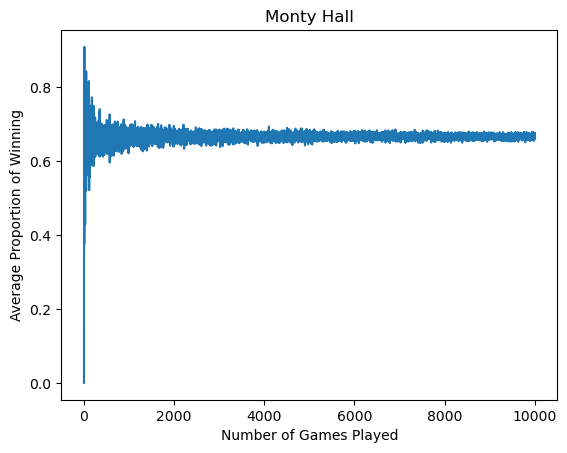

In [25]:
fig, ax = plt.subplots()

ax.plot(N, ac)
ax.set_title("Monty Hall")
ax.set_ylabel("Average proportion of sub-games won")
ax.set_xlabel("Number of sub-games that were played")

plt.show()

#### Conclusion:
After the 2000th mark and close to 10,000, the average proportion of sub-games won converges to around 64 per cent to 68 per cent (maximum 70). This supports the initial reasoning that this problem could be solved using Bayes’ rule (which stated that if we switch the doors, we have a 2/3 probability of winning).